In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os

lenna benchmarking/parallel_4/lenna.txt
bungalows benchmarking/parallel_4/bungalows.txt
sand_dunes benchmarking/parallel_4/sand_dunes.txt
pillar benchmarking/parallel_4/pillar.txt


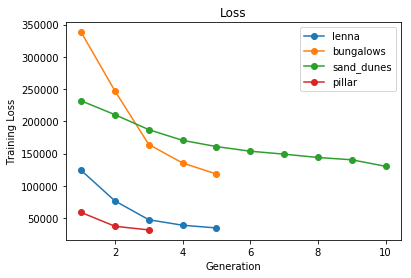

In [39]:
losses = {}
for name in os.listdir('benchmarking/parallel_4'):
    log = 'benchmarking/parallel_4/' + name
    name = name.split('.')[0]
    print(name, log)
    loss = losses[name] = []
    with open(log, 'r+') as f:
        for line in f:
            if 'best loss' in line:
                loss.append(float(line.split(': ')[1].rstrip()))
    iterations = np.arange(len(loss)) + 1
    plt.plot(iterations, loss, '-o', label=name)
plt.title('Loss')
plt.xlabel('Generation')
plt.ylabel('Training Loss')
plt.legend(loc='best')
plt.show()

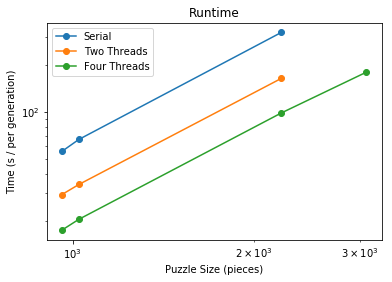

In [40]:
sizes = [960, 1024, 2220, 3072]
serial = np.array([55.56, 66.24, 321])
two_threads = np.array([29.4, 34.1, 163])
four_threads = np.array([17.4, 20.4, 97.9, 178.6])

plt.title('Runtime')
plt.loglog(sizes[:3], serial, '-o', label='Serial')
plt.loglog(sizes[:3], two_threads, '-o', label='Two Threads')
plt.loglog(sizes, four_threads, '-o', label='Four Threads')
plt.xlabel('Puzzle Size (pieces)')
plt.ylabel('Time (s / per generation)')
plt.legend(loc='best')
plt.show()

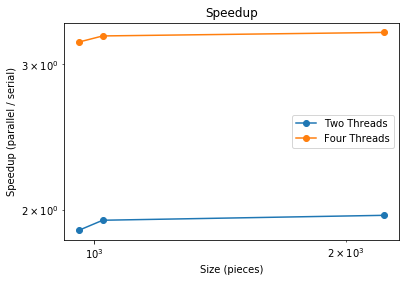

In [41]:
speedup_2 = serial / two_threads
speedup_4 = serial / four_threads[:3]
plt.title('Speedup')
plt.loglog(sizes[:3], speedup_2, '-o', label='Two Threads')
plt.loglog(sizes[:3], speedup_4[:3], '-o', label='Four Threads')
plt.xlabel('Size (pieces)')
plt.ylabel('Speedup (parallel / serial)')
plt.legend(loc='best')
plt.show()